In [2]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [4]:
election_results=pd.read_csv('./election_results.csv')

In [6]:
election_results.replace({False: 0, True: 1}, inplace=True)

In [7]:
election_results.head()

,Unnamed: 0,Candidate_name,Party,State,District,Incumbent,Winner,Raised,Spent,percent_raised,percent_spent
0,0,Jerry Carl,R,Alabama,1,0,1,1971321,1859349,96.095624,95.925703
1,1,James Averhart,D,Alabama,1,0,0,80095,78973,3.904376,4.074297
2,0,Barry Moore,R,Alabama,2,0,1,650807,669368,92.070532,92.281307
3,1,Phyllis Harvey,D,Alabama,2,0,0,56050,55988,7.929468,7.718693
4,0,Mike D Rogers,R,Alabama,3,1,1,1193111,1218564,95.956760,96.747133


Text(0.5, 1.0, 'Probability of Winning changes with Funds Raised (%)')

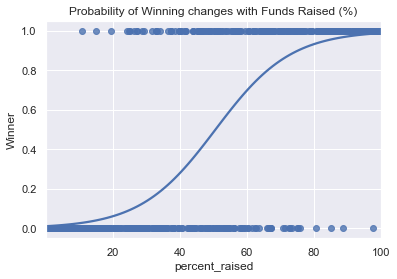

In [250]:
#fit a logistic regression to visualise how the probability of winning changes with changes in the %of funds raised
sns.set_theme(color_codes=True)
sns.regplot(x='percent_raised', y='Winner',
            data=election_results,
            logistic=True,
            ci=None);
plt.title('Probability of Winning changes with Funds Raised (%)')

In [249]:
#election_results.describe()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


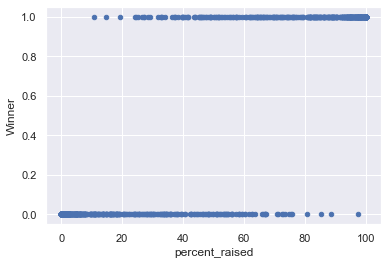

In [252]:
election_results.plot(kind='scatter', x= 'percent_raised', y='Winner');


In [255]:
#Fitting a logistic regression model
base_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[[]]),
                 family=sm.families.Binomial())
                 .fit()
                 )

In [11]:
base_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      893
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -619.10
Date:                Wed, 20 Oct 2021   Deviance:                       1238.2
Time:                        09:49:48   Pearson chi2:                     894.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0716      0.067     -1.070      0.285      -0.203       0.060
==============================================================================
"""

In [256]:
funds_raised_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[['percent_raised']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

In [22]:
funds_raised_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -206.37
Date:                Wed, 20 Oct 2021   Deviance:                       412.75
Time:                        10:02:22   Pearson chi2:                     580.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5028      0.314    -14.354      0.000      -5.118      -3.888
percent_raised     0.0890      0.006     15.651      0.000       0.078       0.100
==================================================================================
"""

In [24]:
import numpy as np

In [25]:
print(np.exp(base_logreg.params))

const    0.930886
dtype: float64


In [26]:
#Computing Odds Ratio. Indicates that one unit increase in percent_raised increases the odds of
#winning by 1.09 times
print(np.exp(funds_raised_logreg.params))

const             0.011078
percent_raised    1.093069
dtype: float64


In [31]:
x=np.linspace(start=election_results['percent_raised'].min(),
            stop = election_results['percent_raised'].max(),
            num = 200)
np.exp(funds_raised_logreg.params['const'] + funds_raised_logreg.params['percent_raised']*x)[:5]

array([0.01107942, 0.01158611, 0.01211597, 0.01267006, 0.0132495 ])

In [32]:
funds_raised_logreg.predict(sm.add_constant(x))[:5]

array([0.01095801, 0.01145341, 0.01197093, 0.01251154, 0.01307624])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


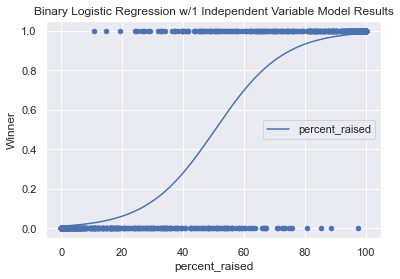

In [40]:
election_results.plot(kind='scatter', x= 'percent_raised', y='Winner')
y=funds_raised_logreg.predict(sm.add_constant(x))
plt.plot(x,y, label = "percent_raised")
plt.legend();
plt.title('Binary Logistic Regression w/1 Independent Variable Model Results');



In [257]:
spent_logreg = (sm.GLM(endog = election_results['Winner'],
                 exog = sm.add_constant(election_results[['percent_spent']]),
                 family=sm.families.Binomial())
                 .fit()
                 )

In [42]:
spent_logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 Winner   No. Observations:                  894
Model:                            GLM   Df Residuals:                      892
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -217.48
Date:                Wed, 20 Oct 2021   Deviance:                       434.95
Time:                        10:36:22   Pearson chi2:                     615.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -4.4779      0.310    -14.436      0.000      -5.086      -3.870
percent_spent     0.0886      0.006     15.667      0.000       0.078       0.100
=================================================================================
"""

In [46]:
x_spent=np.linspace(start=election_results['percent_spent'].min(),
            stop = election_results['percent_spent'].max(),
            num = 200)


In [48]:
np.exp(spent_logreg.params['const'] + spent_logreg.params['percent_spent']*x_spent)[:5]

array([0.01135672, 0.01187377, 0.01241436, 0.01297955, 0.01357048])

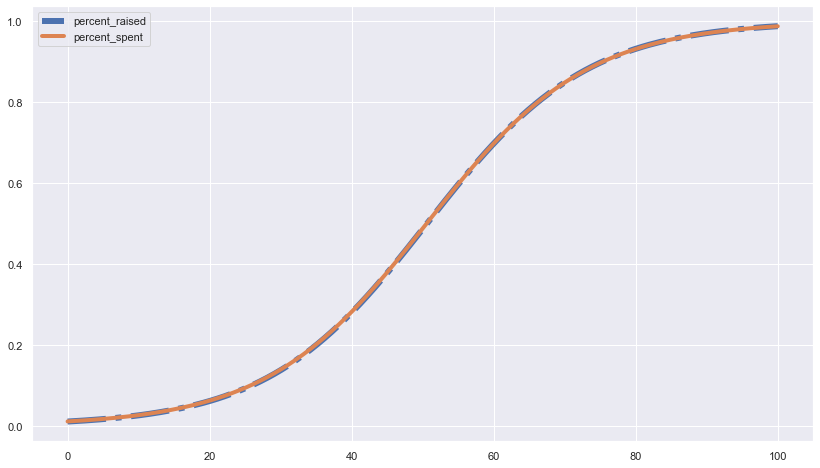

In [51]:
y=funds_raised_logreg.predict(sm.add_constant(x))
y_spent=spent_logreg.predict(sm.add_constant(x_spent))
plt.figure(figsize=(14,8))
plt.plot(x,y, label = "percent_raised", linewidth=6.0, linestyle='-.')
plt.plot(x_spent,y_spent, label = "percent_spent", linewidth=4.0)
plt.legend();

In [52]:
from scipy.stats import binom

In [ ]:
#prob of winning given the amount raised:

In [59]:
p=np.exp(funds_raised_logreg.params)[1]/(1+np.exp(funds_raised_logreg.params)[1])

In [212]:
p

0.5222326674116182

In [258]:
#election_results.corr()

In [161]:
party_ratio=election_results.loc[election_results['Winner']==1,:].groupby(['State','Party'])['Winner'].count().reset_index()

In [267]:
#party_ratio.head()

In [180]:
state_winners = party_ratio.groupby(['State']).agg({'Winner':'sum'}).reset_index().rename(columns={'Winner':'AllWins'})
party_ratio = pd.merge(state_winners, party_ratio, on=['State'])

In [ ]:
#Republicans winning 65% of the time across all states

In [188]:
party_ratio['win_r'] = party_ratio['Winner'] / party_ratio['AllWins']
party_ratio[party_ratio['Party'] == 'R']['win_r'].mean()

0.6555539395294165

In [268]:
#party_ratio.head()

In [230]:
pivoted_ratio=pd.pivot_table(data=party_ratio,columns='Party', values='Winner', index='State')

In [269]:

#pivoted_ratio.plot(kind='bar', stacked=True, figsize=(14,8))

In [234]:
pivoted_ratio_percentage=pd.pivot_table(data=party_ratio,columns='Party', values='win_r', index='State')

Text(0.5, 1.0, 'Democrats vs Republicans Wins')

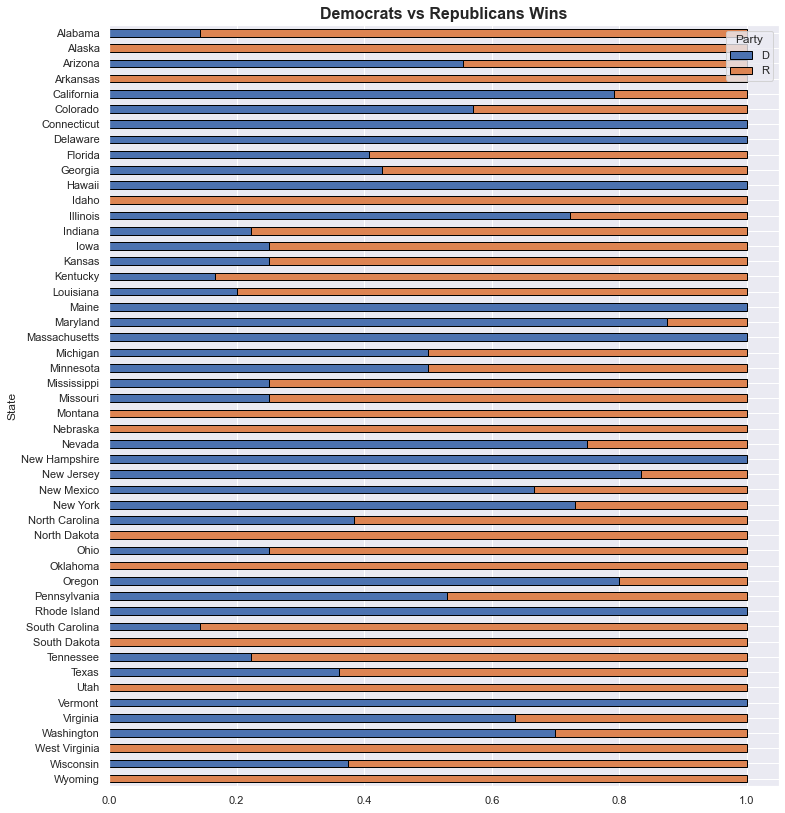

In [266]:
pivoted_ratio_percentage.plot.barh(stacked=True, edgecolor='black',figsize=(12,14)).invert_yaxis();
plt.title("Democrats vs Republicans Wins", fontweight ='bold', fontsize ='16')

In [80]:
import requests

In [82]:
URL1 = 'https://www.opensecrets.org/races/candidates?cycle=2020&id=TN02&spec=N'
response = requests.get(URL1)

In [83]:
response.status_code

200

In [84]:
from bs4 import BeautifulSoup as BS

In [85]:
soup_contributors = BS(response.text)

In [87]:
print(soup_contributors.prettify())

<!DOCTYPE html>
<!--[if lte IE 8]><html class="no-js lte-ie9 lte-ie8" lang="en" dir="ltr"><![endif]-->
<!--[if IE 9]><html class="no-js lte-ie9" lang="en" dir="ltr"><![endif]-->
<!--[if gt IE 9]><!-->
<html class="no-js" dir="ltr" lang="en">
 <!--<![endif]-->
 <head>
  <!-- Google Tag Manager -->
  <script>
   (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
      'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
      })(window,document,'script','dataLayer','GTM-MKPRXNV');
  </script>
  <!-- End Google Tag Manager -->
  <meta charset="utf-8"/>
  <script type="text/javascript">
   window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"NRJS-b7f93d6e9afef1935a5","applicationID":"1109265918","transactionName":"dFpeQkdcWQoGRE1DV1tcRF9WWlQIE

In [210]:
soup_contributors.findAll('div', attrs = {'class' : 'Members--bio u-richtext'})

[<div class="Members--bio u-richtext">
 <h2><strong>
 <a href="/members-of-congress/tim-burchett/summary?cid=N00041594">Tim Burchett (R) • <i>Incumbent</i></a>
  • <span class="winner"><i>Winner</i></span> </strong></h2>
 </div>,
 <div class="Members--bio u-richtext">
 <h2><strong>
 										Renee Hoyos (D)
 								</strong></h2>
 </div>]

In [211]:
pd.read_html(str(soup_contributors.findAll('table')))

[               0           1   2
 0        Raised:  $1,336,276 NaN
 1         Spent:    $878,488 NaN
 2  Cash on Hand:    $593,678 NaN,
                       Type of Contribution    Amount Percentage
 0  Small Individual Contributions (≤ $200)  $343,014     25.67%
 1           Large Individual Contributions  $729,831     54.62%
 2                       PAC Contributions*  $269,535     20.17%
 3                 Candidate self-financing        $0      0.00%
 4                                    Other   -$6,105     -0.46%,
       Type of Disclosure    Amount Percentage
 0        Full Disclosure  $708,346     99.09%
 1  Incomplete Disclosure    $5,250      0.73%
 2          No Disclosure    $1,250      0.17%,
                0         1   2
 0        Raised:  $812,784 NaN
 1         Spent:  $816,793 NaN
 2  Cash on Hand:      $210 NaN,
                       Type of Contribution    Amount Percentage
 0  Small Individual Contributions (≤ $200)        $0      0.00%
 1           Large Indiv